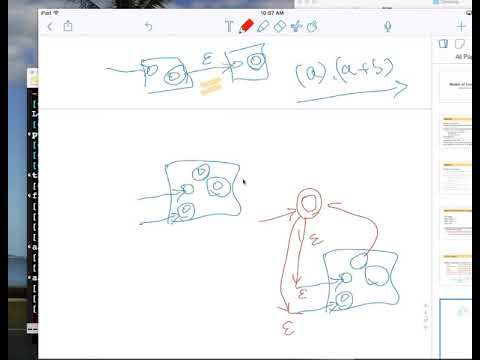

In [1]:
# This Youtube video walks through this notebook
from IPython.display import YouTubeVideo
YouTubeVideo('L6l3c17mpi4')

# All chapters till Ch10 coming to play in Jove

In [22]:
from Imports.DotBashers import *
from Imports.Def_md2mc import *
from Imports.Def_NFA   import *
from Imports.Def_DFA   import *
from Imports.Def_RE2NFA    import *
from Imports.Def_NFA2RE    import *

# Postage Stamp Problem solved using RE and min_dfa

The postage-stamp problem tries to answer the following question (typically posed wrt two postage stamp denominations that are relatively prime)

* Given an unlimited supply of x cent stamps and an unlimited supply of y cent stamps

  - where x and y are relatively prime
  
* Find out the largest denomination that you CANNOT make

* E.g., given 3 cent and 5 cent stamps (x=3, y=5)

  - Check they are relatively prime
  
    * Their GCD must be 1
    
  - Check!
  
* What is the largest postage that CANNOT be made using just 3 and 5 cents?

* Approaches:

  - Trial and error
  
    * 0, 3, 3+3, 3+5, 5+3, 5+5, 5+5+3, ...
    
  - Traditional math books:
  
    * Use Sylvester's theorem to find the Frobenius number
    
  - What I observed about a decade ago (have checked with a few experts and while it is   "out there in the air", nobody had seen it written down...)
  
    * We can use minimal DFA!

    * My approach easily extends to more than two stamps!
    
  - General problem is hard, but has beautiful complexity-theory connections
  
* Onto solving!

## Related Problem: McNugget problem (McNugget Number).
A McNugget number is a positive integer that can be obtained by adding together orders of McDonald's® Chicken McNuggetsTM (prior to consuming any), which originally came in boxes of 6, 9, and 20 (Vardi 1991, pp. 19-20 and 233-234; Wah and Picciotto 1994, p. 186).

__We can find the McNugget Number also using my method !! __

We will do this after solving the postage stamp problem

The numbers are not relatively prime

You will observe something cool when you approach the McNugget problem using REs !!

## Let us solve the Postage Stamp Problem!

In [23]:
p35 = "(aaa+aaaaa)*"

Generating LALR tables


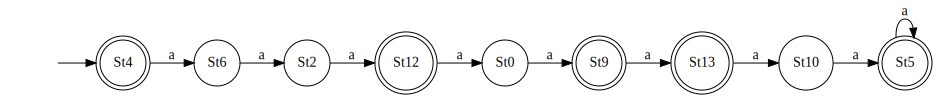

In [24]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(p35))))

In [25]:
p57 = "(aaaaa+aaaaaaa)*"

In [26]:
d57 = min_dfa(nfa2dfa(re2nfa(p57)))

Generating LALR tables


In [27]:
len(d57["Q"])

25

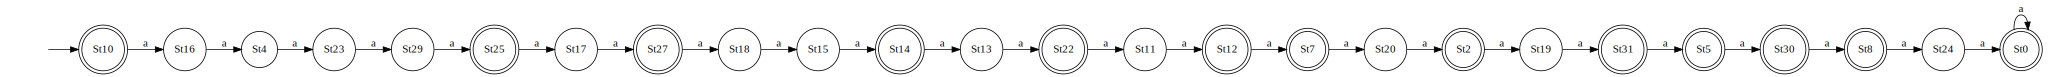

In [28]:
dotObj_dfa(d57)

In [29]:
p36 = "(aaa+aaaaaa)*"

Generating LALR tables


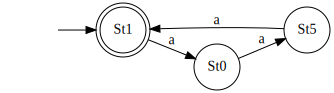

In [30]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(p36))))

In [31]:
Eq01 = md2mc('''
DFA
IF : 0 -> F1
IF : 1 -> F2
F1 : 0 -> F1
F2 : 1 -> F2
F1 : 1 -> S01
F2 : 0 -> S10
S01 : 1 -> S01
S10 : 0 -> S10
S01 : 0 -> Fa1
S10 : 1 -> Fa2
Fa1 : 0 -> F1
Fa1 : 1 -> S01
Fa2 : 1 -> F2
Fa2 : 0 -> S10
''')

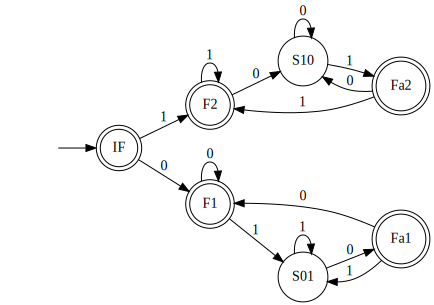

In [32]:
dotObj_dfa(Eq01)

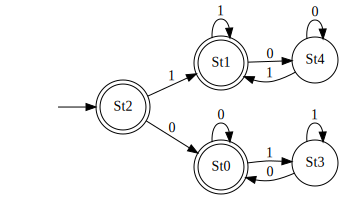

In [33]:
dotObj_dfa(nfa2dfa(rev_dfa(nfa2dfa(rev_dfa(Eq01)))))

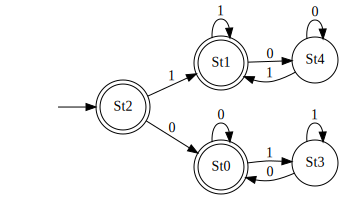

In [34]:
dotObj_dfa(min_dfa_brz(Eq01))

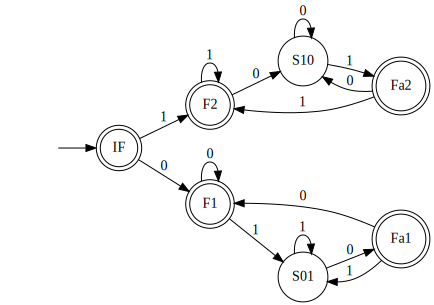

In [35]:
dotObj_dfa(Eq01)

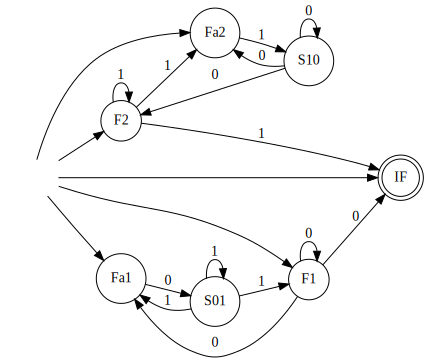

In [36]:
dotObj_nfa(rev_dfa(Eq01))

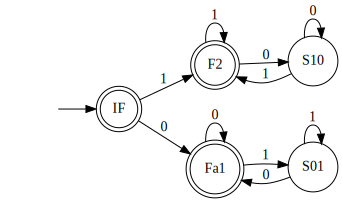

In [37]:
dotObj_dfa(min_dfa(Eq01))

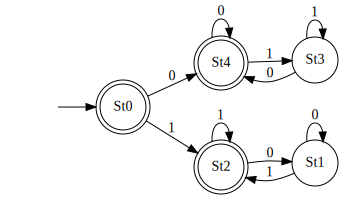

In [38]:
dotObj_dfa(nfa2dfa(rev_dfa(Eq01)))

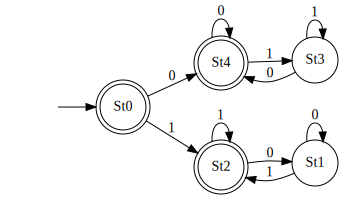

In [39]:
dotObj_dfa(nfa2dfa(rev_dfa(Eq01)))

In [40]:
(G, DO, RE) = del_gnfa_states(mk_gnfa(dfa2nfa(Eq01)))

**** Eliminating state S01 ****
**** Eliminating state F2 ****
**** Eliminating state IF ****
**** Eliminating state Fa1 ****
**** Eliminating state F1 ****
**** Eliminating state Fa2 ****
**** Eliminating state S10 ****


In [41]:
RE

'((((1 ((1)* 0)) (((((1 (((1 ((1)* 0)) + 0) + 0)) + 0) + 0))* (1 (((1 (1)*) + "") + "")))) + (((0 ((((((1 ((1)* 0)) (((1 ((1)* 0)))* 0)) + 0) + 0))* ((((1 ((1)* 0)) ((1 ((1)* 0)))*) + "") + ""))) + (((1 (1)*) + "") + "")) + (((1 (1)*) + "") + ""))) + (((0 ((((((1 ((1)* 0)) (((1 ((1)* 0)))* 0)) + 0) + 0))* ((((1 ((1)* 0)) ((1 ((1)* 0)))*) + "") + ""))) + (((1 (1)*) + "") + "")) + (((1 (1)*) + "") + "")))'

## The book tells you why nfa2re can produce exp. sized RE

# How can I believe that this RE is correct?

Generating LALR tables


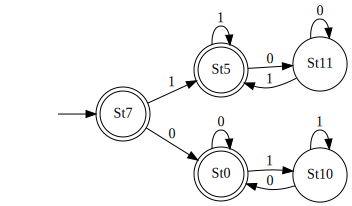

In [42]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(RE))))

In [43]:
rev_dfa

<function Imports.Def_NFA.rev_dfa>

In [44]:
help(rev_dfa)

Help on function rev_dfa in module Imports.Def_NFA:

rev_dfa(D)
    In : D = a partially consistent DFA without any unreachable states.
    Out: A consistent NFA whose language is D's language reversed.



In [45]:
Eq01

{'Delta': {('F1', '0'): 'F1',
  ('F1', '1'): 'S01',
  ('F2', '0'): 'S10',
  ('F2', '1'): 'F2',
  ('Fa1', '0'): 'F1',
  ('Fa1', '1'): 'S01',
  ('Fa2', '0'): 'S10',
  ('Fa2', '1'): 'F2',
  ('IF', '0'): 'F1',
  ('IF', '1'): 'F2',
  ('S01', '0'): 'Fa1',
  ('S01', '1'): 'S01',
  ('S10', '0'): 'S10',
  ('S10', '1'): 'Fa2'},
 'F': {'F1', 'F2', 'Fa1', 'Fa2', 'IF'},
 'Q': {'F1', 'F2', 'Fa1', 'Fa2', 'IF', 'S01', 'S10'},
 'Sigma': {'0', '1'},
 'q0': 'IF'}

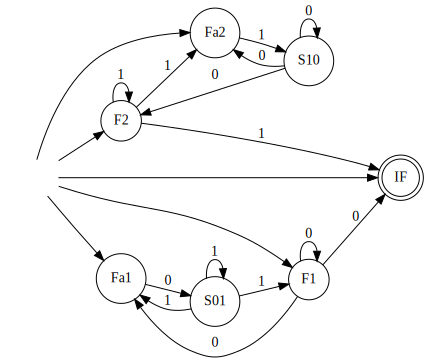

In [46]:
dotObj_nfa(rev_dfa(Eq01))

Generating LALR tables


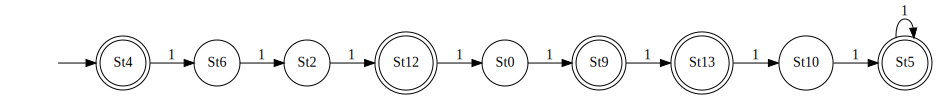

In [47]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("(111+11111)*"))))

In [49]:
RE_lhs = "0*+0*1(''+00*1)*000*"

In [50]:
RE_rhs =  "''+(0+10)*0"

# How to ensure that these REs are equivalent?

Generating LALR tables


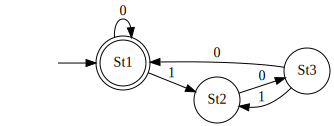

In [51]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(RE_lhs))))

Generating LALR tables


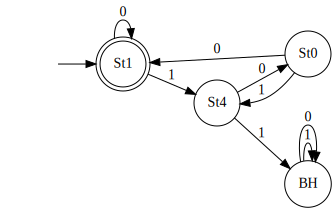

In [53]:
dotObj_dfa_w_bh(min_dfa(nfa2dfa(re2nfa(RE_rhs))))

# For fun, convert RE_lhs and RE_rhs back to RE via re2nfa and nfa2re

In [ ]:
dotObj_nfa(re2nfa("''"))

In [ ]:
dotObj_nfa(re2nfa("a"))

In [ ]:
dotObj_nfa(re2nfa("  (10)* (11)  "))

In [ ]:
re2nfa("  (10)* (11)  ")

In [ ]:
NFA1 = re2nfa("   (a+b+c)(p+q)*(m+n) " )

In [ ]:
dotObj_nfa(mk_gnfa(NFA1))

In [ ]:
GNFA1 = mk_gnfa(NFA1)

In [ ]:
(Gnfa_fina, DO, REfinal) = del_gnfa_states(GNFA1)

In [ ]:
REfinal

In [ ]:
DO[0]

In [ ]:
DO[1]

In [ ]:
DO[2]

In [ ]:
DO[5]

In [ ]:
len(DO)

In [ ]:
DO[13]

In [ ]:
DO[15]

In [ ]:
dotObj_dfa(comp_dfa(min_dfa(nfa2dfa(re2nfa(" (1+0)*(111+000+100+010+001)(1+0)* ")))))

An NFA is a machine $(Q, \Sigma, \delta, Q_0, F)$ which is somewhat like a DFA 
except that 

1. It can start from a __set__ of starting states $Q_0$
    > i.e., the NFA can start from more than one starting state
    
2. Its transition function $\delta$ maps $Q\times (\Sigma\cup \{\varepsilon\})$ to $2^{Q}$
    > i.e., the NFA takes a state $Q$ and a symbol and returns a set of states
    
You can see these aspects being illustrated in the NFA to follow

# RE to NFA

In [ ]:
dotObj_nfa(re2nfa("''"))

In [ ]:
dotObj_nfa(re2nfa("a"))

In [ ]:
dotObj_nfa(re2nfa("ab"))

In [ ]:
dotObj_nfa(re2nfa("a+b"))

In [ ]:
dotObj_nfa(re2nfa("a*"))

In [ ]:
dotObj_nfa(re2nfa("''*"))

In [ ]:
nfromr = re2nfa("ab(a+b)*")

In [ ]:
dotObj_nfa(nfromr)

In [ ]:
dotObj_nfa(re2nfa("(01)*1+0"))

# NFA to RE

In [ ]:
mk_gnfa

In [ ]:
help(mk_gnfa)

In [ ]:
gnfromr = mk_gnfa(nfromr)
dotObj_gnfa(gnfromr)

In [ ]:
del_gnfa_states

In [ ]:
help(del_gnfa_states)

In [ ]:
(Gf, DO, RE) = del_gnfa_states(gnfromr)

In [ ]:
RE

In [ ]:
DO[0]

In [ ]:
DO[6]

In [ ]:
DO[7]

In [ ]:
DO[8]

In [ ]:
DO[9]

In [ ]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(RE))))

In [ ]:
min_dfa

In [ ]:
min_dfa_brz